#Performing Data Analysis and Visualization with Student Alcohol Dataset

Introduction I have performed the data analysis to answer the following questions

How the data is correlated?


How previous grade affects the upcoming one


How Weekly alcohol consumption is distributed


How the grade and walc related(basic level)


How the parenting and walc affects the grade


Finally how the grade and walc related

#Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#loading the data

In [ ]:
data = pd.read_csv('student-mat.csv')
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


#Displaying the columns

In [ ]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

#Displaying the info

Getting the info about the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

#Displaying the categorical data and numerical data

In [ ]:
cat =[]
num =[]
for i in data.columns:
    if data[i].dtype==object:
        cat.append(i)
    else:
        num.append(i)

In [ ]:
print("Categorical Features:{}".format(cat),end="\n\n")
print("Numerical Features:{}".format(num))

Categorical Features:['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

Numerical Features:['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


#correlation

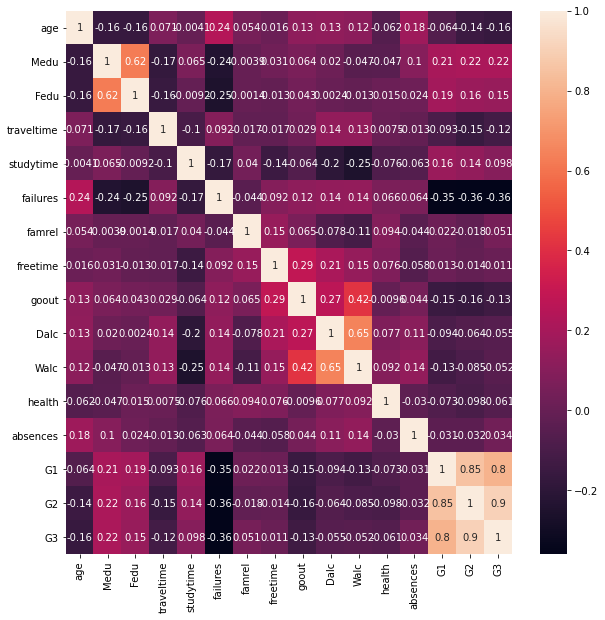

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data[num].corr(),annot = True,cbar = True)

#Finding out the correlated columns using the heatmap

In [ ]:
correlated =[]
corr = data[num].corr()
for i in num:
    for j in num:
        if corr[i][j]>0.80 and i!=j:
            correlated.append(i)
            correlated.append(j)
correlated = list(set(correlated))

In [ ]:
print('correlated columns:{}'.format(correlated))

correlated columns:['G1', 'G3', 'G2']


#Plotting the relationship between G1 and G2

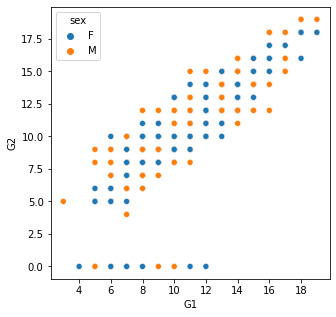

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(x = data['G1'],y = data['G2'],hue =data['sex'])

From this plot i can infer the following details:

* Those you get good grades(>12.5) in G1 no matter what gender she belongs, no
  matter how much she consumes alcohol she will get good grades in the G2  
* Those you get less grade in G1 no matter what gender she belongs, no matter   how much she consumes alcohol she will get less grades in the G2
* Also there lies some outliers which doesn't follow this pattern











# Plotting the relationship between G2 and G3

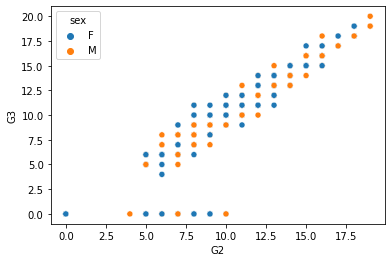

In [ ]:
sns.scatterplot(x = data['G2'],y = data['G3'],hue = data['sex'])

From this plot i can infer the following details:

* Those you get good grades(>12.5) in G2 no matter what gender she belongs, no
  matter how much she consumes alcohol she will get good grades in the G2
* Those you get less grade in G2 no matter what gender she belongs, no matter   how much she consumes alcohol she will get less grades in the G2
* Also there lies some outliers which doesn't follow this pattern






#How is walc distributed?

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


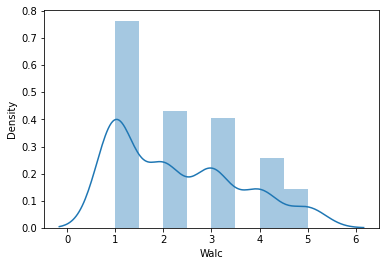

In [ ]:
sns.distplot(data['Walc'],kde =True)

I can Infer the follow details:

* There is no person in the sample who didn't drink at all
* Most of them drink once in the week
* The student who drink 5 times a week is very less









#How the grade and walc related(basic level

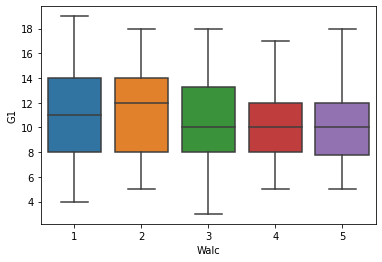

In [ ]:
sns.boxplot(x='Walc',y='G1',data =data)

From this plot i can infer the following details:

* The Range of grade for the people who drink once in a week is 15  
* The Range of grade for the people who drink twice in a week is 13  
* The Range of grade for the people who drink thrice in a week is 16  
* The Range of grade for the people who drink four times a week is 12  
* The Range of grade for the people who drink once in a week is 13  
* The highest Rank for scored by the persons who drink once in a week  
* The lowest Rank was scored by the person who drink thrice a week



# How the parenting and walc affects the grade

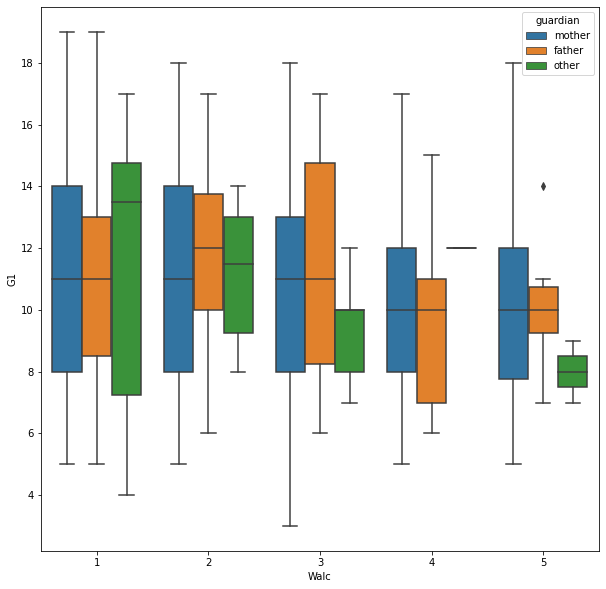

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Walc',y='G1',data =data,hue='guardian')

From this plot I can infer the following details:

* The maximum grade is scored by the student who drinks once in a week and      guarded by mother or father  
* Even if the student drinks five times a day if he is guarded by mother he can score more grade  
* The minimum grade is scored by the student who drinks thrice in a week and guarded by mother   







# Finally how the grade and walc related

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 17.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


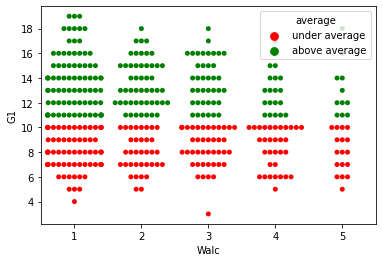

In [ ]:
ave = sum(data.G1)/float(len(data))
data['ave_line'] = ave
data['average'] = ['above average' if i > ave else 'under average' for i in data.G1]
sns.swarmplot(x='Walc', y = 'G1', hue = 'average',data= data,palette={'above average':'green', 'under average': 'red'})

**CONCLOSION:**

Finally from this plot i can infer the following details:

* If student drink once a week it doesn't much affect his grade
* If student drink more than 3 times a week it surely afects his grade  
* The students who drink once a week are the topper with high grade
* The student who drink thrice a week is the low grade scorer
